# Day 1 - Data Science Essentials Program

Agenda

- Setting up intellij
- Pandas

## Jupyter Shortcuts
### Smaller Header

- CTRL ENTER  or SHIFT ENTER --> runs a block of code
    - SHIFT ENTER also moves on to the next block
- A / B - to add a block of code **A**bove or **B**elow
- Y / M - to change the block to Code or Markdown

In [5]:
x = 5
y = 2
x / y #this doesn't show up anymore
print(x/y) #this shows up
x * y #this last line will get outputted

2.5


10

## Pandas Package
- "Excel of Python"
- Exploring, Transforming, Cleaning up data
- Load/import data: xlsx, csv, sql, html
- Sorting, Filtering, Cleaning up, Pivot
- Quick stats
- Calculate your own fields (custom columns)
- Data cleaning
    - removing or cleaning up na (dropna, fillna)
    - converting data types (text to dates, text to numbers)
 
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [6]:
import pandas as pd

In [10]:
#!pip install openpyxl

In [9]:
df = pd.read_excel("ExData/Data Manipulation Worksheet.xlsx")
# df = pd.read_excel("ExData/Data Manipulation Worksheet.xlsx", engine="openpyxl")

In [11]:
df.head() #first 5 rows

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
0,2006-01-28,US Bank N.A.,Global Notes,1000.21,Finance,Lehman Brothers
1,2006-01-28,Alliance National Muni Income Fund,Initial Public Offering,283.6,Finance,Salomon Smith Barney
2,2006-01-28,Lloyds Bank Plc NY,CD Notes,200.58,Finance,Merrill Lynch
3,2006-01-28,FBR Asset Investment Corp,Equity Follow-On Offering,127.2,Real Estate,"Friedman, Billings, Ramsey"
4,2006-01-28,Alliance California Muni Income Fund,Initial Public Offering,117.1,Finance,Salomon Smith Barney


In [12]:
sp500 = pd.read_csv("StockData/SP500.csv")

In [13]:
sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-09-30,1687.260010,1687.260010,1674.989990,1681.550049,1681.550049,3308630000
1,2013-10-01,1682.410034,1696.550049,1682.069946,1695.000000,1695.000000,3238690000
2,2013-10-02,1691.900024,1693.869995,1680.339966,1693.869995,1693.869995,3148600000
3,2013-10-03,1692.349976,1692.349976,1670.359985,1678.660034,1678.660034,3279650000
4,2013-10-04,1678.790039,1691.939941,1677.329956,1690.500000,1690.500000,2880270000


**Coffee break until 10:20am BST / 5:10am EST**

### Exploring Data with Pandas
- .head() / .tail() --> first/last 5 rows
- .info() --> info about the cols, # of rows and data types

In [15]:
#sp500.head(10)
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1260 non-null   object 
 1   Open       1260 non-null   float64
 2   High       1260 non-null   float64
 3   Low        1260 non-null   float64
 4   Close      1260 non-null   float64
 5   Adj Close  1260 non-null   float64
 6   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              557 non-null    datetime64[ns]
 1   ISSUER            564 non-null    object        
 2   TYPE              558 non-null    object        
 3   SIZE              558 non-null    object        
 4   INDUSTRY          557 non-null    object        
 5   LEAD UNDERWRITER  557 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 26.8+ KB


In [17]:
#Option 1 - clean up in Excel then give it the name of the tab or index #
df = pd.read_excel("ExData/Data Manipulation Worksheet.xlsx", sheet_name=1)
                                # sheet_name= "Financing Table Clean"
                    # SHIFT TAB inside the brackets to see the hints


#Option 2 - clean up in pandas
df = pd.read_excel("ExData/Data Manipulation Worksheet.xlsx", skipfooter=11) #skip the last 11 rows

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              557 non-null    datetime64[ns]
 1   ISSUER            557 non-null    object        
 2   TYPE              557 non-null    object        
 3   SIZE              557 non-null    float64       
 4   INDUSTRY          557 non-null    object        
 5   LEAD UNDERWRITER  557 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 26.2+ KB


### Cleaning up dates
- want make sure any date columns have "datetetime" as the data type (NOT object)
- fix while importing with `parse_dates=[colName]`
- or fix after with `pd.to_datetime(table[colname])`

In [23]:
#sp500.info()
sp500 = pd.read_csv("StockData/SP500.csv", parse_dates=['Date'])
    #pandas will "figure it out" --> but sometimes it could guess incorrectly

In [28]:
aapl = pd.read_csv("StockData/AAPL.csv")
aapl['Date'] = pd.to_datetime(aapl['Date'], format='%Y-%m-%d')
# aapl.info()

In [30]:
pd.to_datetime('10/05/2013') #??? Oct 5? or is it May 10??

Timestamp('2013-10-05 00:00:00')

In [31]:
pd.to_datetime('10/05/2013', format='%d/%m/%Y')  #May 10, 2013
        #output in python will always by year-month-day

Timestamp('2013-05-10 00:00:00')

### Changing the index
- it's useful to change the identifier for your rows
- by default it uses row numbers (e.g. row 0, 1, 2, 3...)
- you can pick a different column as the index
    - the index doesn't need to have unique values
- how to do it:
    - while importing  `index_col=[column]`
    - after importing  `table.set_index(column)`

In [35]:
sp500 = pd.read_csv("StockData/SP500.csv", parse_dates=['Date'], index_col=['Date'])

In [38]:
#sp500.info()
#aapl.info()

In [41]:
#sp500

### Accessing Your Data
- slice rows, columns, combinations of rows&cols
- extract just one number/cell
- rows:
    - `table.iloc[x:y]` --> integer location --> x-y are row numbers
    - `table.loc[x:y]` --> location --> x-y are values from your new index (e.g. dates)
- columns:
    - `table[header]`
    - `table[[col1, col2, col3,...]]`
- slice (Rows & Cols):
    - `table.iloc[x:y][header]`

In [46]:
#Just rows
# sp500.iloc[0:5]
df.iloc[0:5]
    #  0 <= row < 5
df.iloc[10:15] #  15-10= 5 --> output is 5 rows long
df.iloc[-5:] #last 5 rows, leave blank to go ALL the way to the end

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
552,2006-06-21,Alabama Power Company,Sr Notes,350.0,Utility,Lehman Brothers
553,2006-06-21,Sears Roebuck Acceptance Corp,Sr Notes,250.1,Finance,Merrill Lynch
554,2006-06-21,DQE Inc,Equity Follow-On Offering,202.5,Utility,Lehman Brothers
555,2006-06-21,MassMutual,Global Notes,200.1,Finance,Morgan Stanley
556,2006-06-21,Conceptus Inc,Equity Follow-On Offering,72.0,Healthcare,UBS Warburg


In [49]:
df.iloc[0] #first row

DATE                2006-01-28 00:00:00
ISSUER                    US Bank N.A. 
TYPE                       Global Notes
SIZE                            1000.21
INDUSTRY                        Finance
LEAD UNDERWRITER        Lehman Brothers
Name: 0, dtype: object

In [47]:
df.iloc[-5:-1] # -1 - -5 = -1 + 5 = 4 rows output
    # this DOES NOT include the last row
    # stops at the second last row

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
552,2006-06-21,Alabama Power Company,Sr Notes,350.0,Utility,Lehman Brothers
553,2006-06-21,Sears Roebuck Acceptance Corp,Sr Notes,250.1,Finance,Merrill Lynch
554,2006-06-21,DQE Inc,Equity Follow-On Offering,202.5,Utility,Lehman Brothers
555,2006-06-21,MassMutual,Global Notes,200.1,Finance,Morgan Stanley


In [51]:
#df.loc['2006-06-21'] #this DOES NOT work, because I didn't change the index

In [54]:
#sp500.loc['2013-10-07']
sp500.loc['2013-10-01':'2013-10-07']
    #FINALLY INCLUSIVE! - it includes the last data point in range

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-01,1682.410034,1696.550049,1682.069946,1695.000000,1695.000000,3238690000
2013-10-02,1691.900024,1693.869995,1680.339966,1693.869995,1693.869995,3148600000
2013-10-03,1692.349976,1692.349976,1670.359985,1678.660034,1678.660034,3279650000
2013-10-04,1678.790039,1691.939941,1677.329956,1690.500000,1690.500000,2880270000
2013-10-07,1687.150024,1687.150024,1674.699951,1676.119995,1676.119995,2678490000


**Using Date as an Index**
- if your index is datetime, you can filter for months, quarters, years, etc.

In [59]:
# sp500.loc['2017']
sp500.loc['2017-03'] #all of March 2017
sp500.loc['2017-01':'2017-03'] #calendar Q1 of 2017

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3770530000
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3764890000
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000
...,...,...,...,...,...,...
2017-03-27,2329.110107,2344.899902,2322.250000,2341.590088,2341.590088,3240230000
2017-03-28,2339.790039,2363.780029,2337.629883,2358.570068,2358.570068,3367780000
2017-03-29,2356.540039,2363.360107,2352.939941,2361.129883,2361.129883,3106940000


In [62]:
df['ISSUER']

0                              US Bank N.A. 
1        Alliance National Muni Income Fund 
2                        Lloyds Bank Plc NY 
3                 FBR Asset Investment Corp 
4      Alliance California Muni Income Fund 
                       ...                  
552                   Alabama Power Company 
553           Sears Roebuck Acceptance Corp 
554                                 DQE Inc 
555                              MassMutual 
556                           Conceptus Inc 
Name: ISSUER, Length: 557, dtype: object

In [68]:
headers = ['Close','Open'] #list
type(headers)
#sp500[headers]

list

In [70]:
sp500['Close'] #one header
sp500[['Close','Open']] #multiple headers -> use a list as the input
sp500.loc['2017'][['Close','Open']] #only Close and Open for 2017 data
sp500.loc['2017-01-09']['Close'] #only one number as the output

2268.899902

In [73]:
sp500 #dataframe --> table
sp500['Open'] #series --> one column 
sp500.loc['2017-01-09']['Close'] #one float

2268.899902

In [76]:
sp500.columns #Date is not one of the cols anymore

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [78]:
#sp500['Date'] #doesn't work
sp500.index

DatetimeIndex(['2013-09-30', '2013-10-01', '2013-10-02', '2013-10-03',
               '2013-10-04', '2013-10-07', '2013-10-08', '2013-10-09',
               '2013-10-10', '2013-10-11',
               ...
               '2018-09-17', '2018-09-18', '2018-09-19', '2018-09-20',
               '2018-09-21', '2018-09-24', '2018-09-25', '2018-09-26',
               '2018-09-27', '2018-09-28'],
              dtype='datetime64[ns]', name='Date', length=1260, freq=None)

## Exploring Data - Calcs and Stats
- `.describe()` --> summary stats (max, min, mean, std)
- `.min()`, `.max()`

In [83]:
sp500['Close'].max()

2930.75

In [84]:
sp500['Close'].mean()

2208.5791827325397

In [82]:
sp500.describe()
sp500.loc['2017'].describe() #stats only for 2017 data
sp500.loc['2017'][['Close','Volume']].describe()

,Close,Volume
count,251.000000,2.510000e+02
mean,2449.076379,3.412303e+09
std,109.417247,5.169052e+08
min,2257.830078,1.349780e+09
25%,2365.584961,3.143255e+09
50%,2436.100098,3.374410e+09
75%,2524.240112,3.646220e+09
max,2690.159912,5.723920e+09


## Calculated Fields
- simple calcs with matrix math, e.g. df[col1] / df[col2]
    - no need for looping

In [111]:
sp500['Volume million'] = sp500['Volume'] / 10**6
sp500['Intraday Returns'] = sp500['Close'] / sp500['Open'] - 1
        # Close / Open - 1 = (Close-Open) / Open
sp500['Daily Return'] = sp500['Close'] / sp500['Close'].shift(1) - 1
            # close today /close yesterday - 1
            #careful, this only works IF dates are sorted old to new

In [112]:
sp500['Returns'] = sp500['Close'].pct_change() #same as close/close.shift - 1

In [115]:
#sp500.head()

## Filtering Data
- so far we've only filtered on the index (e.g. filter by dates)
- if you want to filter using other columns:
    - table[conditions]
    - and vs. or logic:
        - and --> ALL the conditions have to be True to get back a True
        - or --> ANY of the conditions could be True to get a True
        - in pandas you have to use the symbols
            - and --> &
            - or --> |

In [107]:
df[df['LEAD UNDERWRITER'].str.contains('Morgan')]
        #can use regex with str.contains

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
5,2006-01-28,SeaChange International Inc,Equity Follow-On Offering,104.200,Computers & Electronics,Morgan Stanley
6,2006-01-28,National City Bank,Bank Notes,100.212,Finance,J.P. Morgan
17,2006-01-30,Chugach Electic Assoc Inc,Sr Notes,180.200,Utility,J.P. Morgan
21,2006-01-31,Smurfit-Stone Container Corp,Equity Follow-On Offering,115.130,Paper & Packaging,Morgan Stanley
26,2006-02-01,American Express Credit Corp.,Sr Notes,250.380,Finance,Morgan Stanley
...,...,...,...,...,...,...
531,2006-06-13,Georgia Power Capital Trust V,Preferred Securities,400.000,Finance,Morgan Stanley
535,2006-06-13,National City Bank,Bank Notes,75.000,Finance,J.P. Morgan
539,2006-06-17,St. Joe Co,Equity Follow-On Offering,203.000,Paper & Packaging,Morgan Stanley
542,2006-06-17,Hub International Ltd,Equity Follow-On Offering,84.000,Insurance,J.P. Morgan


In [106]:
#find all the deals done by J.P. Morgan
df[   df['LEAD UNDERWRITER']=='J.P. Morgan' ]

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
6,2006-01-28,National City Bank,Bank Notes,100.212,Finance,J.P. Morgan
17,2006-01-30,Chugach Electic Assoc Inc,Sr Notes,180.200,Utility,J.P. Morgan
48,2006-02-07,Bayer Hypo Vereinsbnk NY,CD Notes,100.203,Finance,J.P. Morgan
52,2006-02-08,Bayerische Landesbank (New York),CD Notes,100.202,Finance,J.P. Morgan
61,2006-02-12,Trinity Industries,Notes,170.000,Metal & Steel,J.P. Morgan
...,...,...,...,...,...,...
521,2006-06-10,JP Morgan Chase,Bank Notes,91.000,Finance,J.P. Morgan
524,2006-06-11,Westpac Banking Corp NY,CD Notes,100.103,Finance,J.P. Morgan
528,2006-06-12,Westpac Banking Corp NY,CD Notes,100.102,Finance,J.P. Morgan
535,2006-06-13,National City Bank,Bank Notes,75.000,Finance,J.P. Morgan


In [103]:
#find all the share prices of S&P 500 greater than 2920 
sp500[sp500['Close'] > 2920 ]

,Open,High,Low,Close,AdjClose,Volume,adj_close
Date,,,,,,,
2018-09-20,2919.72998,2934.800049,2919.729980,2930.750000,2930.750000,3337730000,2930.750000
2018-09-21,2936.76001,2940.909912,2927.110107,2929.669922,2929.669922,5607610000,2929.669922


In [101]:
#find share prices bw 2500 and 2510
sp500[ (sp500['Close']>2500) & (sp500['Close']<2510)]

#2 steps
c1 = sp500['Close']>2500
c2 = sp500['Close']<2510
sp500[c1 & c2]

,Open,High,Low,Close,AdjClose,Volume,adj_close
Date,,,,,,,
2017-09-15,2495.669922,2500.229980,2493.159912,2500.229980,2500.229980,4853170000,2500.229980
2017-09-18,2502.510010,2508.320068,2499.919922,2503.870117,2503.870117,3194300000,2503.870117
2017-09-19,2506.290039,2507.840088,2503.189941,2506.649902,2506.649902,3249100000,2506.649902
2017-09-20,2506.840088,2508.850098,2496.669922,2508.239990,2508.239990,3530010000,2508.239990
2017-09-21,2507.159912,2507.159912,2499.000000,2500.600098,2500.600098,2930860000,2500.600098
2017-09-22,2497.260010,2503.469971,2496.540039,2502.219971,2502.219971,2865960000,2502.219971
2017-09-27,2503.300049,2511.750000,2495.909912,2507.040039,2507.040039,3456030000,2507.040039


In [91]:
#sp500.Close same as sp500['Close']

In [95]:
#Q: Renaming or creating alias for columns
sp500['adj_close'] = sp500['Adj Close'] #this makes a new column (duplicate)
sp500.rename(columns={'Adj Close':'AdjClose'}, inplace=True) #renames
sp500

,Open,High,Low,Close,AdjClose,Volume,adj_close
Date,,,,,,,
2013-09-30,1687.260010,1687.260010,1674.989990,1681.550049,1681.550049,3308630000,1681.550049
2013-10-01,1682.410034,1696.550049,1682.069946,1695.000000,1695.000000,3238690000,1695.000000
2013-10-02,1691.900024,1693.869995,1680.339966,1693.869995,1693.869995,3148600000,1693.869995
2013-10-03,1692.349976,1692.349976,1670.359985,1678.660034,1678.660034,3279650000,1678.660034
2013-10-04,1678.790039,1691.939941,1677.329956,1690.500000,1690.500000,2880270000,1690.500000
...,...,...,...,...,...,...,...
2018-09-24,2921.830078,2923.790039,2912.629883,2919.370117,2919.370117,3372210000,2919.370117
2018-09-25,2921.750000,2923.949951,2913.699951,2915.560059,2915.560059,3285480000,2915.560059
2018-09-26,2916.979980,2931.149902,2903.280029,2905.969971,2905.969971,3388620000,2905.969971


## Lunch Break until 1pm BST/ 8am EST
- if you're back from lunch early, you can try some of the practice questions in Production folder:
    - Production/miniPandasAssignmentQuestions.py

## Working Session until 1:30pm BST / 8:30am EST
- join your assigned breakout room
- finish up the miniPandas assignment (in Production folder)
- if you get stuck or want some hints, there will be a "Ask For Help" button on your zoom bar

In [117]:
#%% Questions

#1) Load Apple data set (StockData --> aapl.csv) 
    #and Financing Deals data set (ExData --> Data Manip --> Clean tab)

#2) Find all the days of Apple where closing share price was between 70 and 75
    
#3) Financing Deals data (Data Manip file) --> find all deals done by GS and JPM

#4) Find all the deals done in May of 2006
#5) Find all the deals done by Merrill Lynch in Real Estate
#6) Calculate the returns of Apple's closing share price
    #what is the average return and standard deviation?

## Takeup Mini Pandas Assignment

**Q1 - load up the data sets**

In [130]:
aapl = pd.read_csv("StockData/AAPL.csv", parse_dates=['Date'], index_col=['Date'])
finData = pd.read_excel("ExData/Data Manipulation Worksheet.xlsx", sheet_name="Financing Table Clean")

**Q2 - Apple share prices bw 70 and 75**
- can use a range with 2 conditions, e.g. >70 and <75
- `df[col].between(low, high)`

In [132]:
filterQ2 = aapl[  (aapl['Close']>=70)  &  (aapl['Close']<=75) ]

In [136]:
filterQ2 = aapl[aapl['Close'].between(70, 75)] #default is inclusive on both #s
            # can change to inclusive="neither" 
# filterQ2

In [135]:
pd.__version__
    #or use pip list in the devshell

'2.0.3'

**Q3 - Deals done by GS and JPMorgan**
- J.P. Morgan, Goldman Sachs
- table[(table[col]=="Goldman Sachs") | (....)]
- table[table[col].isin(list of options)]

In [145]:
finData['LEAD UNDERWRITER'].value_counts() #COUNTIF by category

LEAD UNDERWRITER
Merrill Lynch                     192
J.P. Morgan                        66
Salomon Smith Barney               57
Morgan Stanley                     50
Banc of America Securities         43
Goldman Sachs                      30
Credit Suisse First Boston         27
Lehman Brothers                    21
Deutsche Bank                      16
UBS Warburg                         9
Friedman, Billings, Ramsey          6
Bear Stearns                        6
Robertson Stephens                  5
Bank One Capital Markets            5
Wachovia Securities                 4
Robert W. Baird                     4
Jefferies & Company                 3
U.S. Bancorp Piper Jaffray Inc      2
Barclays Capital                    2
Needham & Company                   2
Adams, Harkness & Hill Inc.         1
Stephens Inc.                       1
Raymond James & Associates          1
McDonald Investments, Inc.          1
SoundView Technology Group          1
ABN AMRO                         

In [143]:
# finData.head(10)
sorted(finData['LEAD UNDERWRITER'].unique())

['ABN AMRO',
 'Adams, Harkness & Hill Inc.',
 'Banc of America Securities',
 'Bank One Capital Markets',
 'Barclays Capital',
 'Bear Stearns',
 'Credit Suisse First Boston',
 'Deutsche Bank',
 'Friedman, Billings, Ramsey',
 'Goldman Sachs',
 'J.P. Morgan',
 'Jefferies & Company',
 'Lehman Brothers',
 'McDonald Investments, Inc.',
 'Merrill Lynch',
 'Morgan Stanley',
 'Needham & Company',
 'Raymond James & Associates',
 'Robert W. Baird',
 'Robertson Stephens',
 'Salomon Smith Barney',
 'SoundView Technology Group',
 'Stephens Inc.',
 'U.S. Bancorp Piper Jaffray Inc',
 'UBS Warburg',
 'Wachovia Securities',
 'William Blair & Company']

In [139]:
# finData[finData['LEAD UNDERWRITER'].str.contains('Morgan')] #both Morgan Stanley and JPM

In [147]:
c1 = finData['LEAD UNDERWRITER'] == 'Goldman Sachs'
c2 = finData['LEAD UNDERWRITER'] == 'J.P. Morgan'
finData[c1 | c2].head()

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
6,2006-01-28,National City Bank,Bank Notes,100.212,Finance,J.P. Morgan
10,2006-01-29,Southern Co. Capital Funding,Sr Notes,400.200,Utility,Goldman Sachs
17,2006-01-30,Chugach Electic Assoc Inc,Sr Notes,180.200,Utility,J.P. Morgan
30,2006-02-05,Aramark Corporation,Equity Follow-On Offering,793.500,Retail,Goldman Sachs
42,2006-02-06,"Netscreen Technologies, Inc.",Equity Follow-On Offering,184.000,Computers & Electronics,Goldman Sachs


In [148]:
banks_filter = ['Goldman Sachs', 'J.P. Morgan', 'Lehman Brothers']
finData[finData['LEAD UNDERWRITER'].isin(banks_filter)]

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
0,2006-01-28,US Bank N.A.,Global Notes,1000.210,Finance,Lehman Brothers
6,2006-01-28,National City Bank,Bank Notes,100.212,Finance,J.P. Morgan
10,2006-01-29,Southern Co. Capital Funding,Sr Notes,400.200,Utility,Goldman Sachs
17,2006-01-30,Chugach Electic Assoc Inc,Sr Notes,180.200,Utility,J.P. Morgan
30,2006-02-05,Aramark Corporation,Equity Follow-On Offering,793.500,Retail,Goldman Sachs
...,...,...,...,...,...,...
535,2006-06-13,National City Bank,Bank Notes,75.000,Finance,J.P. Morgan
537,2006-06-14,United Dominion Realty Trust Inc.,Sr Notes,150.000,Real Estate,Goldman Sachs
542,2006-06-17,Hub International Ltd,Equity Follow-On Offering,84.000,Insurance,J.P. Morgan
552,2006-06-21,Alabama Power Company,Sr Notes,350.000,Utility,Lehman Brothers


**Q4 - Deals in May of 2006**
- change the DATE as index, then use .loc['2006-05']
- greater = than May 1, less than Jun 1
- .between()
- year == 2006 and month == 5
    - .dt.year, .dt.month, .dt.day

In [182]:
aapl.index.year

Index([2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       ...
       2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
      dtype='int32', name='Date', length=1259)

In [153]:
#finData[finData['DATE']=='2006-05'] #this only pulls out May 1
        #this pull out entire month only with the .loc[date]

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
426,2006-05-01,Verizon New England Inc,Preferred Securities,450.100,Telecommunications,Morgan Stanley
427,2006-05-01,Mills Corp,Equity Follow-On Offering,177.130,Real Estate,Morgan Stanley
428,2006-05-01,Comerica Bank,Bank Notes,100.118,Finance,Salomon Smith Barney


In [152]:
#finData['DATE'].dt.quarter
#finData['DATE'].dt.month
finData[(finData['DATE'].dt.month==5) & (finData['DATE'].dt.year==2006)]

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
426,2006-05-01,Verizon New England Inc,Preferred Securities,450.100,Telecommunications,Morgan Stanley
427,2006-05-01,Mills Corp,Equity Follow-On Offering,177.130,Real Estate,Morgan Stanley
428,2006-05-01,Comerica Bank,Bank Notes,100.118,Finance,Salomon Smith Barney
429,2006-05-02,General Electric Capital Corporation,Global Notes,250.210,Finance,Lehman Brothers
430,2006-05-02,M&I Bank,CD Notes,100.117,Finance,Merrill Lynch
...,...,...,...,...,...,...
492,2006-05-30,Conectiv Inc.,Notes,250.130,Utility,Morgan Stanley
493,2006-05-30,Falconbridge Limited,Notes,250.140,Metal & Steel,Merrill Lynch
494,2006-05-30,PS Business Parks Inc,Equity Follow-On Offering,106.330,Real Estate,Goldman Sachs
495,2006-05-30,America First Mortgage Investments,Equity Follow-On Offering,81.900,Real Estate,"Friedman, Billings, Ramsey"


In [156]:
finData.set_index('DATE') #only temporarily changing the index
    #the original table is not modified

#finData = finData.set_index('DATE')
finData.set_index('DATE',inplace=True)

In [159]:
#finData.loc['2006-05']
finData.loc['2006-05-1'] #index doesn't have to be unique

,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
DATE,,,,,
2006-05-01,Verizon New England Inc,Preferred Securities,450.100,Telecommunications,Morgan Stanley
2006-05-01,Mills Corp,Equity Follow-On Offering,177.130,Real Estate,Morgan Stanley
2006-05-01,Comerica Bank,Bank Notes,100.118,Finance,Salomon Smith Barney


In [160]:
pd.__version__

'2.0.3'

In [165]:
#test = pd.read_excel('ExData/Data Manipulation Worksheet.xlsx', sheet_name=1, 
 #                    index_col=['DATE']) #doesn't work

test = pd.read_excel('ExData/Data Manipulation Worksheet.xlsx', sheet_name=1, 
                    index_col=[0])
# test.loc['2006-05']

In [191]:
test = pd.read_excel('ExData/Data Manipulation Worksheet.xlsx', sheet_name=1, 
                    index_col='DATE') #can provide one string as index, just not a list of strings like with read_csv

**Q5 - Real Estate deals by ML**

In [166]:
filter5 = finData[ (finData['LEAD UNDERWRITER']=="Merrill Lynch") & 
                  (finData['INDUSTRY']=="Real Estate")]
filter5

,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
DATE,,,,,
2006-02-25,Cohen & Steers Quality Income Fund,Initial Public Offering,510.0,Real Estate,Merrill Lynch
2006-04-23,Heritage Property Investment Trust Inc,Initial Public Offering,450.2,Real Estate,Merrill Lynch
2006-05-15,iStar Financial Inc,Equity Follow-On Offering,292.5,Real Estate,Merrill Lynch
2006-05-16,Heritage Property Investment Trust,Equity Follow-On Offering,450.0,Real Estate,Merrill Lynch


**Q: How to work with multi-index**

In [177]:
pivot = finData.groupby(['INDUSTRY','TYPE'])[['SIZE']].sum()
# pivot.info()
pivot.loc[('Transportation','Sr Notes')]['SIZE']

1185.632

In [180]:
pivot.loc['Transportation']

,SIZE
TYPE,
Equity Follow-On Offering,523.460
Notes,200.200
Sr Notes,1185.632


In [176]:
pivot = pivot.reset_index()
pivot[(pivot['INDUSTRY']=='Transportation') & (pivot['TYPE']=='Sr Notes')]

,INDUSTRY,TYPE,SIZE
70,Transportation,Sr Notes,1185.632


**Q6 - avg and std of Apple returns**

In [184]:
aapl['Returns'] = aapl['Close'].pct_change()
aapl['Returns'].describe()

count    1258.000000
mean        0.001035
std         0.014176
min        -0.079927
25%        -0.005891
50%         0.000756
75%         0.008359
max         0.081982
Name: Returns, dtype: float64

In [185]:
aapl['Returns'].mean(), aapl['Returns'].std()

(0.0010348227901117826, 0.014176156222248508)

In [188]:
#!pip install matplotlib

<Axes: >

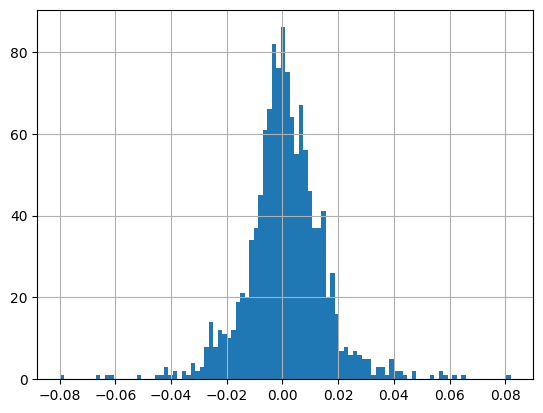

In [190]:
aapl['Returns'].hist(bins=100) #10 categories/bins by default

### Coffee break until 2:40pm BST / 9:40am EST
- if you're back from coffee early go ahead and finish installing the rest of the packages
- you can find them all typed out in the `Packages to Install.ipynb` file
```
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install scipy
!pip install statsmodels
!pip install scikit-learn
```

**Afternoon Agenda**
- advanced data cleaning
    - more complex string methods for text data:  .str.method()
    - convert text data into numerical: `.astype(float)`, `.astype(int)`, `pd.to_numeric(column)`
    - can also use your own "clean-up" function with `.apply()`
- merging data - concat, merge
- grouping data - creating pivot tables
- visualization with pandas

### Advanced Data Cleaning

In [194]:
ipoData = pd.read_csv('ExData/iposTable.csv')
ipoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            100 non-null    object 
 1   Symbol             100 non-null    object 
 2   Industry           100 non-null    object 
 3   Offer Date         100 non-null    object 
 4   Shares (millions)  100 non-null    float64
 5   Offer Price        100 non-null    object 
 6   1st Day Close      100 non-null    object 
 7   Current Price      100 non-null    object 
 8   Return             100 non-null    object 
 9   SCOOP Rating       100 non-null    object 
dtypes: float64(1), object(9)
memory usage: 7.9+ KB


In [214]:
# ipoData.head()
ipoData = pd.read_csv('ExData/iposTable.csv', parse_dates=['Offer Date'], index_col=['Symbol'])

In [199]:
# ipoData.loc['NUVL']

In [203]:
#Just using "normal python" for now
x = "$1,000.0"
float(x.replace(',','').strip('$'))
        #string methods

#pandas -->   df['column'].str.formula()
ipoData['Offer Price'].str.strip('$') #doesn't change original column

Symbol
MTAL.U    10.00
NUVL      17.00
RLYB      13.00
SWAGU     10.00
COOK      18.00
          ...  
FEMY      13.00
TRMR      19.00
AOMR      19.00
ISPC       8.00
LYEL      17.00
Name: Offer Price, Length: 100, dtype: object

In [207]:
pd.to_numeric('50.5')
        #float('50.5'), int('50')

50.5

In [209]:
pd.to_numeric(['50.5','100','-20'])

array([ 50.5, 100. , -20. ])

In [216]:
#ipoData['Offer Price'] = ipoData['Offer Price'].str.strip('$').astype(float)
#ipoData['Current Price'] = pd.to_numeric(ipoData['Current Price'].str.strip('$').str.replace(',',''))
#ipoData.info()

In [219]:
ipoData = pd.read_csv('ExData/iposTable.csv', parse_dates=['Offer Date'], index_col=['Symbol'])
colsFix = ['Offer Price', 'Current Price', '1st Day Close']


#ipoData['Offer Price'] = ipoData['Offer Price'].str.strip('$').astype(float)
#ipoData['Current Price'] = ipoData['Current Price'].str.strip('$').astype(float)
#ipoData['1st Day Close'] = ipoData['1st Day Close'].str.strip('$').astype(float)
for col in colsFix:
    print(col)
    ipoData[col] = ipoData[col].str.strip('$').str.replace(',','').astype(float)

Offer Price
Current Price
1st Day Close


### Cleaning with .apply()
- first create a function that cleans up one piece of text/row
- then use .apply() to apply the function on the entire column
- slide 80 for more advanced examples

In [221]:
sp500_messy = pd.read_csv('ExData/sp500_Cos_ValMetrics.csv')
sp500_messy.head()

,Symbol,Market Cap (intraday),Enterprise Value,Trailing P/E,Forward P/E,PEG Ratio (5 yr expected),Price/Sales (ttm),Price/Book (mrq),Enterprise Value/Revenue,Enterprise Value/EBITDA,Beta
0,A,45.29B,46.9B,49.92,32.38,3.33,7.79,9.42,8.06,30.30,1.01
1,AAL,12.84B,47.76B,NaN,-286.00,0.05,1.00,NaN,3.72,-4.44,1.85
2,AAP,13.67B,16.37B,22.45,17.10,1.55,1.27,3.87,1.52,13.20,1.38
3,AAPL,2.43T,2.4T,32.74,27.27,1.53,7.47,35.13,7.38,24.05,1.21
4,ABBV,208.26B,280.2B,40.48,8.44,2.04,4.15,15.18,5.58,11.42,0.80


In [222]:
def cleanFinancials(x): # x = one piece of string
    #this will clean up the market cap and EV, if already in billions, keep as billions
        #otherwise convert trillions to billions
        #if no letter, assume it was millions --> divide by 1000 to get billions
    if 'B' in x: #keep it as billions
        clean = float(x.strip('B').replace(',',''))
    elif 'T' in x:
        clean = float(x.strip('T').replace(',','')) * 1000
    else:
        clean = float(x.replace(',','')) / 1000

    return clean

In [225]:
cleanFinancials("500B")
cleanFinancials("5T")
cleanFinancials("5,230.5")

5.2305

In [228]:
sp500_messy['Enterprise Value (bn)'] = sp500_messy['Enterprise Value'].apply(cleanFinancials)
                            # the column in front of .apply() is your "x" input
                
sp500_messy[['Enterprise Value (bn)','Enterprise Value']]


,Enterprise Value (bn),Enterprise Value
0,46.90,46.9B
1,47.76,47.76B
2,16.37,16.37B
3,2400.00,2.4T
4,280.20,280.2B
...,...,...
499,45.93,45.93B
500,41.82,41.82B
501,28.17,28.17B
502,1.37,1.37B


### Using .apply() with an axis
- can apply the function on multiple inputs/columns
    - axis = 1 --> function is applied row by row
    - axis = 0 --> function is applied column by column

In [233]:
import numpy as np
sp500[['Open','Close']].apply(np.mean, axis=0)
            #taking average for EACH column
            #axis = 0 --> do the average column by column

Open     2208.119022
Close    2208.579183
dtype: float64

In [234]:
sp500[['Open','Close']].apply(np.mean, axis=1)
        #average for EACH row
        #e.g. average(open,close) for each date

Date
2013-09-30    1684.405029
2013-10-01    1688.705017
2013-10-02    1692.885010
2013-10-03    1685.505005
2013-10-04    1684.645019
                 ...     
2018-09-24    2920.600097
2018-09-25    2918.655029
2018-09-26    2911.474976
2018-09-27    2912.824951
2018-09-28    2912.005004
Length: 1260, dtype: float64

**Coffee Break until 10:40am EST / 3:40pm BST**
- when you're back go ahead and import the files below

### Merging Data
- concat --> "stack" the data on top of one another (gluing the data)
- merge --> put the data side by side, line it up on a specific column (vlookup)

#### Concat
- `pd.concat(list of dataframes)`

In [261]:
aapl = pd.read_csv('StockData/AAPL.csv',parse_dates=['Date'],index_col=['Date'])
sp500 = pd.read_csv('StockData/SP500.csv',parse_dates=['Date'],index_col=['Date'])
nke = pd.read_csv('StockData/NKE.csv',parse_dates=['Date'],index_col=['Date'])

In [264]:
nke['Ticker'] = 'NKE'
# sp500['ticker'] = 'SP500'
# sp500['symbol'] = 'SP500'
sp500['Ticker'] = 'SP500' #make sure the spelling of the cols is the same for all tables
aapl['Ticker'] = 'AAPL'

In [267]:
allData = pd.concat([aapl, nke, sp500])
#allData.loc['2013-10-07']



,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2013-10-01,68.349998,69.877144,68.339996,69.708572,63.523125,88470900,AAPL
0,2013-10-01,36.520000,36.625000,36.009998,36.209999,32.963387,10444400,NKE
0,2013-09-30,1687.260010,1687.260010,1674.989990,1681.550049,1681.550049,3308630000,SP500


In [268]:
#Question what happens if no index set
aapl = pd.read_csv('StockData/AAPL.csv',parse_dates=['Date'])
sp500 = pd.read_csv('StockData/SP500.csv',parse_dates=['Date'])
nke = pd.read_csv('StockData/NKE.csv',parse_dates=['Date'])
allData = pd.concat([aapl,sp500,nke])
allData.loc[0]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-10-01,68.349998,69.877144,68.339996,69.708572,63.523125,88470900
0,2013-09-30,1687.260010,1687.260010,1674.989990,1681.550049,1681.550049,3308630000
0,2013-10-01,36.520000,36.625000,36.009998,36.209999,32.963387,10444400


In [269]:
allData.reset_index(inplace=True)
allData

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2013-10-01,68.349998,69.877144,68.339996,69.708572,63.523125,88470900
1,1,2013-10-02,69.375717,70.257141,69.107140,69.937141,63.731426,72296000
2,2,2013-10-03,70.072861,70.335716,68.677139,69.058571,62.930801,80688300
3,3,2013-10-04,69.122856,69.228569,68.371429,69.004288,62.881340,64717100
4,4,2013-10-07,69.508568,70.378571,69.335716,69.678574,63.495800,78073100
...,...,...,...,...,...,...,...,...
3773,1254,2018-09-24,85.160004,85.260002,84.250000,84.269997,84.269997,8770400
3774,1255,2018-09-25,84.860001,85.099998,84.070000,84.790001,84.790001,10519500
3775,1256,2018-09-26,82.610001,84.730003,81.949997,83.699997,83.699997,16357100
3776,1257,2018-09-27,83.769997,84.919998,83.730003,84.540001,84.540001,6080600


### Automate concat to merge more than 2-3 files

In [272]:
tickers = ['NKE','AAPL','DIS','WMT','JPM']

#aapl = pd.read_csv('StockData/AAPL.csv',parse_dates=['Date'],index_col=['Date'])
#aapl['Ticker'] = 'AAPL'

# pd.concat([table1, table2, table3 .....])

#store the tables as you loop through them
#allData = pd.DataFrame() #empty table

container_tables = [] #empty list

for x in tickers:
    print(x)
    table = pd.read_csv('StockData/' + x + '.csv',parse_dates=['Date'],index_col=['Date'])
    table['Ticker'] = x

    container_tables.append(table)

NKE
AAPL
DIS
WMT
JPM


In [278]:
# container_tables[3]
allData = pd.concat(container_tables)
allData

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2013-10-01,36.520000,36.625000,36.009998,36.209999,32.963387,10444400,NKE
2013-10-02,36.020000,36.130001,35.794998,35.945000,32.722153,8751600,NKE
2013-10-03,35.945000,36.250000,35.529999,35.820000,32.608356,7144600,NKE
2013-10-04,35.884998,36.174999,35.660000,36.070000,32.835945,7168200,NKE
2013-10-07,35.705002,35.985001,35.650002,35.669998,32.471794,5172800,NKE
...,...,...,...,...,...,...,...
2018-09-24,117.760002,118.459999,116.430000,116.720001,116.720001,12492500,JPM
2018-09-25,117.040001,117.970001,116.320000,116.389999,116.389999,9308300,JPM
2018-09-26,116.750000,116.870003,114.660004,115.019997,115.019997,14023600,JPM


### Merging Data Side by Side

In [ ]:
aapl = pd.read_csv('StockData/AAPL.csv',parse_dates=['Date'],index_col=['Date'])
sp500 = pd.read_csv('StockData/SP500.csv',parse_dates=['Date'],index_col=['Date'])

In [288]:
# aapl.info() #2013-10-01 to 2018-09-28
# sp500.info() #2013-09-30 to 2018-09-28

In [291]:
merged = sp500.merge(aapl, how='outer', on='Date')
            #default = inner merge

merged = sp500.merge(aapl, how='outer', on='Date', suffixes=('_SP','_AAPL'))
            #default suffixes is _x, _y
            # left_on='Closing Date', right_on='date'
            # left_on=['Date','Ticker'], right_on = ['date', 'symbol']
merged

,Open_SP,High_SP,Low_SP,Close_SP,Adj Close_SP,Volume_SP,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Adj Close_AAPL,Volume_AAPL
Date,,,,,,,,,,,,
2013-09-30,1687.260010,1687.260010,1674.989990,1681.550049,1681.550049,3308630000,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-01,1682.410034,1696.550049,1682.069946,1695.000000,1695.000000,3238690000,68.349998,69.877144,68.339996,69.708572,63.523125,88470900.0
2013-10-02,1691.900024,1693.869995,1680.339966,1693.869995,1693.869995,3148600000,69.375717,70.257141,69.107140,69.937141,63.731426,72296000.0
2013-10-03,1692.349976,1692.349976,1670.359985,1678.660034,1678.660034,3279650000,70.072861,70.335716,68.677139,69.058571,62.930801,80688300.0
2013-10-04,1678.790039,1691.939941,1677.329956,1690.500000,1690.500000,2880270000,69.122856,69.228569,68.371429,69.004288,62.881340,64717100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-24,2921.830078,2923.790039,2912.629883,2919.370117,2919.370117,3372210000,216.820007,221.259995,216.630005,220.789993,220.789993,27693400.0
2018-09-25,2921.750000,2923.949951,2913.699951,2915.560059,2915.560059,3285480000,219.750000,222.820007,219.699997,222.190002,222.190002,24554400.0
2018-09-26,2916.979980,2931.149902,2903.280029,2905.969971,2905.969971,3388620000,221.000000,223.750000,219.759995,220.419998,220.419998,23984700.0


### Grouping Data - Pivots
- `table.groupby(categories to summarize)[[headers to calc]].function()`
- finData.groupby(['INDUSTRY'])[['SIZE']].sum()

In [295]:
finData = pd.read_excel('ExData/Data Manipulation Worksheet.xlsx',sheet_name=1)

In [303]:
# finData['INDUSTRY'].value_counts()

#finData.groupby(['INDUSTRY'])[['SIZE']].count()
pivot = finData.groupby(['INDUSTRY','TYPE'])[['SIZE']].sum()
pivot.loc[('Chemicals', 'Notes')] #refering to data with multi index

SIZE    200.26
Name: (Chemicals, Notes), dtype: float64

In [302]:
pivot.reset_index() #to get rid of the multi index

,INDUSTRY,TYPE,SIZE
0,Auto/Truck,Equity Follow-On Offering,206.250
1,Broadcasting,Equity Follow-On Offering,78.750
2,Chemicals,Equity Follow-On Offering,431.540
3,Chemicals,Notes,200.260
4,Chemicals,Sr Notes,1100.570
...,...,...,...
70,Transportation,Sr Notes,1185.632
71,Utility,Equity Follow-On Offering,1980.650
72,Utility,Notes,765.250
73,Utility,Preferred Securities,350.477
